# Clustering woven hand 

## Exercice 1 : k-means

Suppose you want to use the $k$-means algorithm with Euclidean distance to cluster the following
8 examples into 3 clusters: 
$$A_1=(2,10), A_2=(2,5), A_3=(8,4), A_4=(5,8), A_5=(7,5), A_6=(6,4), A_7=(1,2), A_8=(4,9).$$

The **distance** matrix based on the **squared** Euclidean distance is given below: 


|    | A1 | A2 | A3 | A4 | A5 | A6 | A7 | A8 |
|----|----|----|----|----|----|----|----|----|
| A1 | 0  | 25 | 36 | 13 | 50 | 52 | 65 | 5  |
| A2 |    |  0 | 37 | 18 | 25 | 17 | 10 | 20 |
| A3 |    |    |  0 | 25 | 2  | 2  | 53 | 41 |
| A4 |    |    |    | 0  | 13 | 17 | 52 | 2  |
| A5 |    |    |    |    |  0 | 2  | 45 | 25 |
| A6 |    |    |    |    |    |  0 | 29 | 29 |
| A7 |    |    |    |    |    |    | 0  | 58 |
| A8 |    |    |    |    |    |    |    | 0  |

 
Suppose that the initial centers of each cluster are $A_1$, $A_4$ and $A_7$.
Run the k-means algorithm for  1 epoch only. At the end of this epoch give: 

1. The new clusters (i.e. the examples belonging to each cluster) 
2. The centers of the new clusters 
3. Plot the 8 points and show the clusters after the first epoch and the new centroids (use
   function _discrete_scatter_ in file _plot_2D_clusters.py_)
4. Iterate. How many more iterations are needed to converge? Plot the results for each epoch

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import plot_2D_clusters as pc

In [2]:
# build the X array with 8 rows and 2 columns
X = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
X

array([[ 2, 10],
       [ 2,  5],
       [ 8,  4],
       [ 5,  8],
       [ 7,  5],
       [ 6,  4],
       [ 1,  2],
       [ 4,  9]])

In [3]:
# build the array with the centers
c1 = X[0, :]
c2 = X[3, :]
c3 = X[6, :]
centers = np.vstack([c1, c2, c3])
centers

array([[ 2, 10],
       [ 5,  8],
       [ 1,  2]])

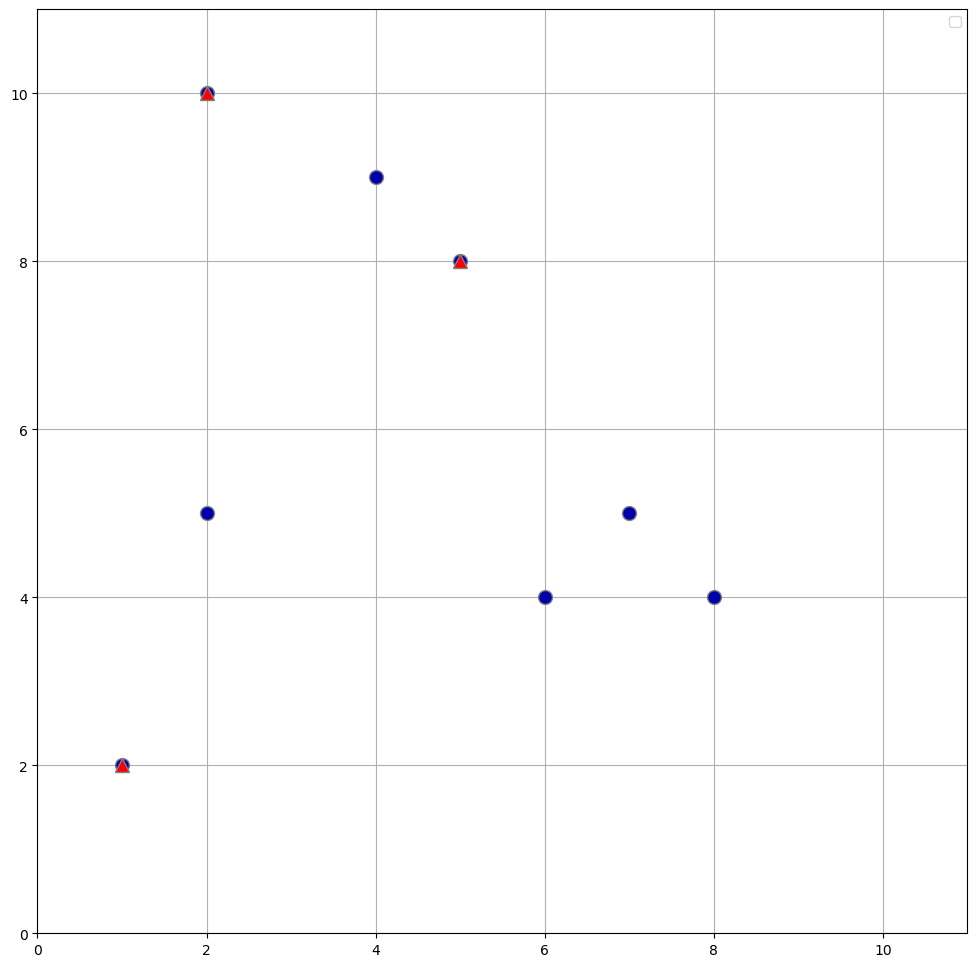

In [4]:
# plot the result
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax = pc.discrete_scatter(x1=X[:, 0], x2=X[:, 1])
ax = pc.discrete_scatter(centers[:, 0], centers[:, 1], ax=ax, markers='^', c='r')

ax.grid()
ax.set_xlim([0, 11])
ax.set_ylim([0, 11])
ax.legend([])
plt.show()

##### First iteration

Update $c_1$, $c_2$ and $c_3$ (see above the initialization of the centers) :

*  for center 1, there is only one point (the point $A_1$)
*  for center 2, there is five points (the points $A_3$, $A_4$, $A_5$, $A_6$ and $A_8$)
*  for center 3, there is the remaining points


In [5]:
y = np.array([1, 3, 2, 2, 2, 2, 3, 2])
y

array([1, 3, 2, 2, 2, 2, 3, 2])

In [6]:
# compute c1, c2 and c3 and stack them (use np.mean( , axis=0))

c1 = X[0, :]
c2 = np.mean(X[[2, 3, 4, 5, 7], :], axis=0)
c3 = np.mean(X[[1, 6], :], axis=0)
centers = np.vstack([c1, c2, c3])
centers

array([[ 2. , 10. ],
       [ 6. ,  6. ],
       [ 1.5,  3.5]])

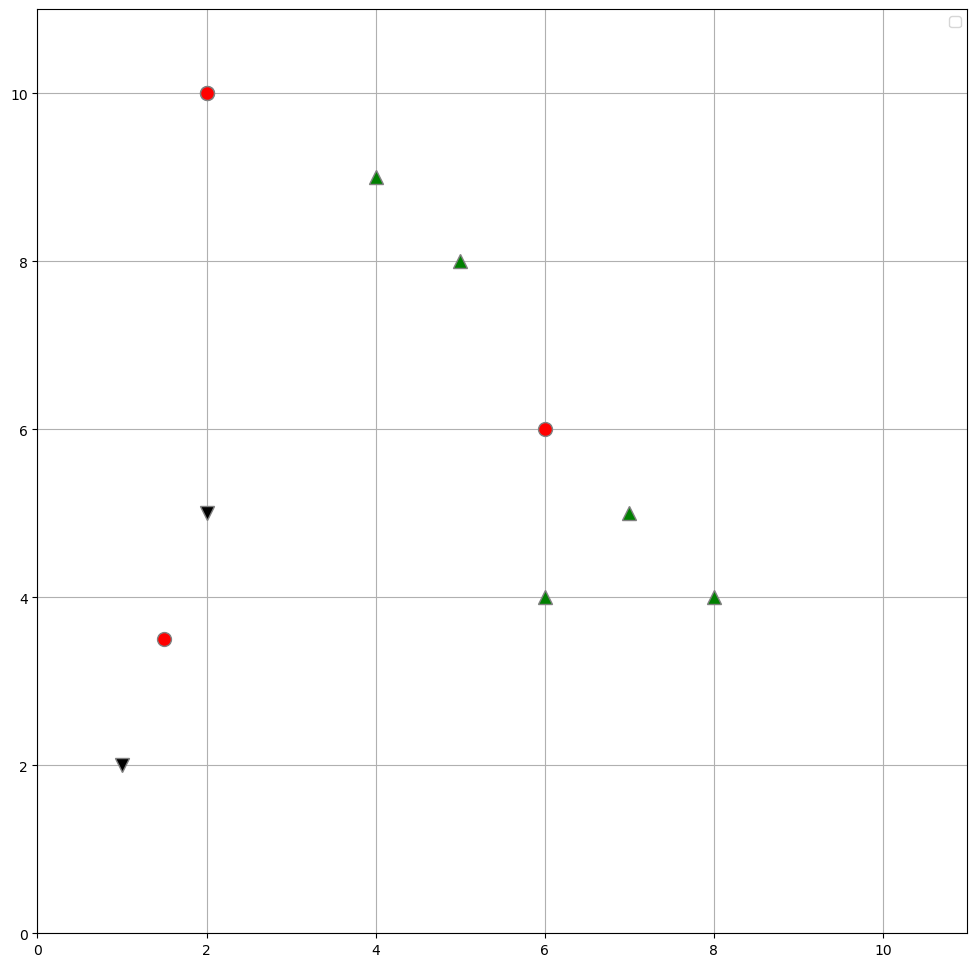

In [7]:
# plot thhe new configuration
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax = pc.discrete_scatter(X[:, 0], X[:, 1], y=y, c=('b', 'g', 'k'), ax=ax)
ax = pc.discrete_scatter(centers[:, 0], centers[:, 1], c='r', ax=ax)

ax.grid()
ax.set_xlim([0, 11])
ax.set_ylim([0, 11])
ax.legend([])
plt.show()

##### Compute the classification

Compute the vector $y$ with the clustering and 

In [8]:
# Compute y

y = np.argmin(np.sum((X[:, np.newaxis, :] - centers) ** 2, axis=2), axis=1)
y

array([0, 2, 1, 1, 1, 1, 2, 0])

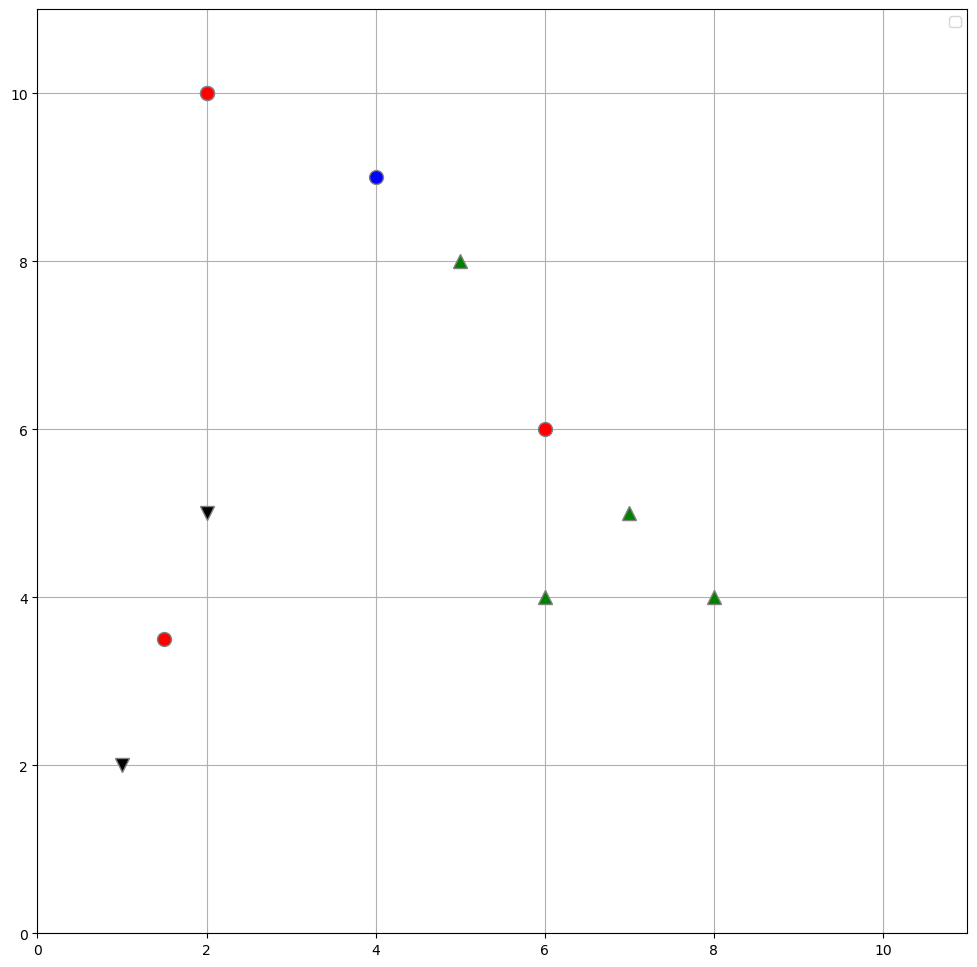

In [9]:
# plot the result

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax = pc.discrete_scatter(X[:, 0], X[:, 1], y=y, c=('b', 'g', 'k'), ax=ax)
ax = pc.discrete_scatter(centers[:, 0], centers[:, 1], c='r', ax=ax)

ax.grid()
ax.set_xlim([0, 11])
ax.set_ylim([0, 11])
ax.legend([])
plt.show()

##### iterate one more time

## Exercice 2 : DBScan

If $\epsilon$ is 2 and minpoint is 2, what are the clusters that DBScan would discover with the following 8 
examples:
$$A_1=(2,10), A_2=(2,5), A_3=(8,4), A_4=(5,8), A_5=(7,5), A_6=(6,4), A_7=(1,2), A_8=(4,9).$$

1. What is the Epsilon neighborhood of each point?
2. Draw the 10 by 10 space and illustrate the  discovered clusters.
3. What if $\epsilon$ is increased to $\sqrt{10}$ ?

- $A_1 = \O \Rightarrow noise$
- $A_2 = \O \Rightarrow noise$
- $A_3 = \{A_5, A_6\} \Rightarrow core$
- $A_5 = \{A_8\} \Rightarrow border$
- $A_5 = \{A_3, A_6\} \Rightarrow core$
- $A_6 = \{A_3, A_5\} \Rightarrow core$
- $A_7 = \O \Rightarrow noise$
- $A_8 = \{A_4\} \Rightarrow border$


Cluster : 
- $\{A_3, A_5, A_7\} = C_1$
- $\{A_4, A_8\} = C_2$
- $A_1$
- $A_2$
- $A_7$

In [10]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=np.sqrt(10), min_samples=2, metric='euclidean')
y_db = db.fit_predict(X)
y_db

array([0, 1, 2, 0, 2, 2, 1, 0])

In [11]:
from sklearn.cluster import KMeans

In [12]:
km = KMeans(n_clusters=2, n_init=10)
y_km = km.fit_predict(X)
y_km

array([1, 0, 0, 1, 0, 0, 0, 1], dtype=int32)

# Clustering in practice

In [13]:
import pandas as pd

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

## Clustering Faithfull data set

Waiting time between eruptions and the duration of the eruption
for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA.

__Format__

A data frame with 272 observations on 2 variables.

[:,1]  eruptions  numeric  Eruption time in mins.\
[:,2]  waiting    numeric  Waiting time to next eruption (in mins).

In [15]:
faithful = pd.read_csv("faithful.csv")
faithful.head()

,Id,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


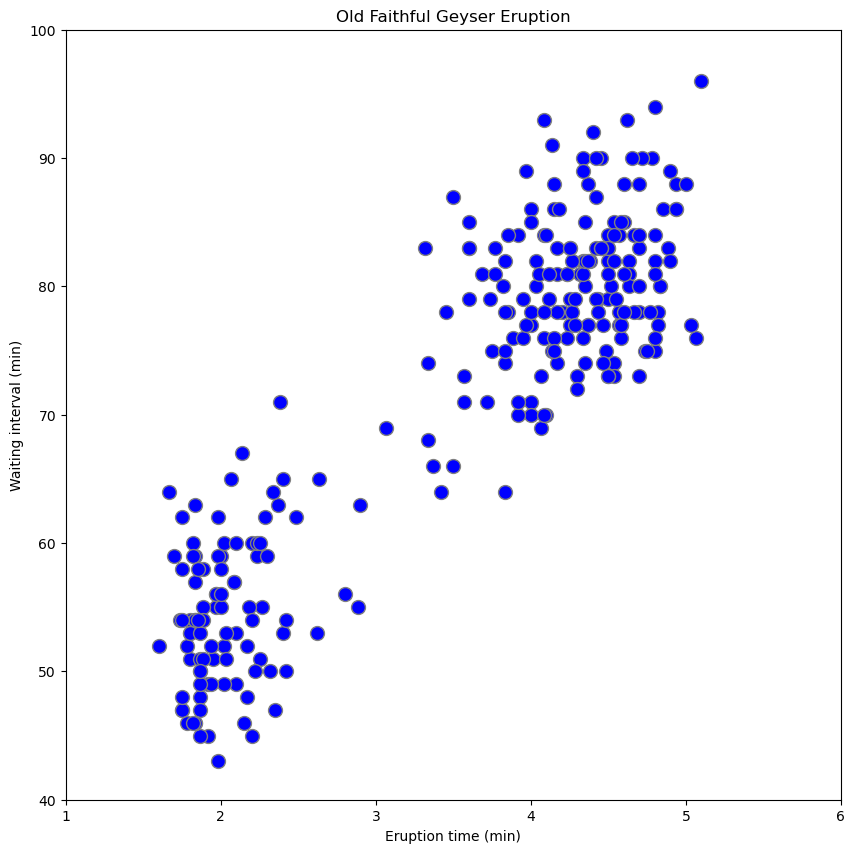

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

pc.discrete_scatter(faithful.eruptions, faithful.waiting, c='b', ax=ax)

ax.set_ylim([40, 100])
ax.set_xlim([1, 6])

ax.set_xlabel('Eruption time (min)')
ax.set_ylabel('Waiting interval (min)')
ax.set_title('Old Faithful Geyser Eruption')

plt.show()

In [17]:
faithful.columns

Index(['Id', 'eruptions', 'waiting'], dtype='object')

**Objective:**

- Perform and compare the results of the *k*-means algorithm and of the Gaussian clustering method with $K=2$ and $K=3$ clusters.

- What's happened with *k*-means when data are not scaled ?

In [18]:
X = faithful[['eruptions', 'waiting']].to_numpy()

In [19]:
StandardScaler().fit_transform(X)

array([[ 0.09849886,  0.59712344],
       [-1.48145856, -1.24518118],
       [-0.13586149,  0.22866251],
       [-1.05750332, -0.6556437 ],
       [ 0.91744345,  1.03927655],
       [-0.53085085, -1.171489  ],
       [ 1.06402839,  1.2603531 ],
       [ 0.09849886,  1.03927655],
       [-1.34979544, -1.46625773],
       [ 0.75681445,  1.03927655],
       [-1.45249268, -1.24518118],
       [ 0.37674691,  0.96558436],
       [ 0.62515133,  0.52343125],
       [-1.52534627, -1.76102647],
       [ 1.06402839,  0.89189218],
       [-1.1593228 , -1.39256555],
       [-1.52534627, -0.6556437 ],
       [ 1.1518038 ,  0.96558436],
       [-1.65700939, -1.39256555],
       [ 0.66903904,  0.59712344],
       [-1.48145856, -1.46625773],
       [-1.52534627, -1.76102647],
       [-0.03316426,  0.52343125],
       [-0.36934409, -0.13979841],
       [ 0.91744345,  0.22866251],
       [ 0.09849886,  0.89189218],
       [-1.33487362, -1.171489  ],
       [ 0.5224541 ,  0.37604688],
       [ 0.31793739,

In [20]:
X[0:5, :]

array([[ 3.6  , 79.   ],
       [ 1.8  , 54.   ],
       [ 3.333, 74.   ],
       [ 2.283, 62.   ],
       [ 4.533, 85.   ]])

In [21]:
# cluster the data into two clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

/Users/thibaultchausson/miniconda3/envs/AI53/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [22]:
kmeans.cluster_centers_

array([[ 4.13135106, 75.21276596],
       [ 2.05673404, 54.05319149],
       [ 4.3690119 , 84.91666667]])

In [23]:
y = kmeans.fit_predict(X)

/Users/thibaultchausson/miniconda3/envs/AI53/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
y[0:5]

array([2, 0, 2, 0, 1], dtype=int32)

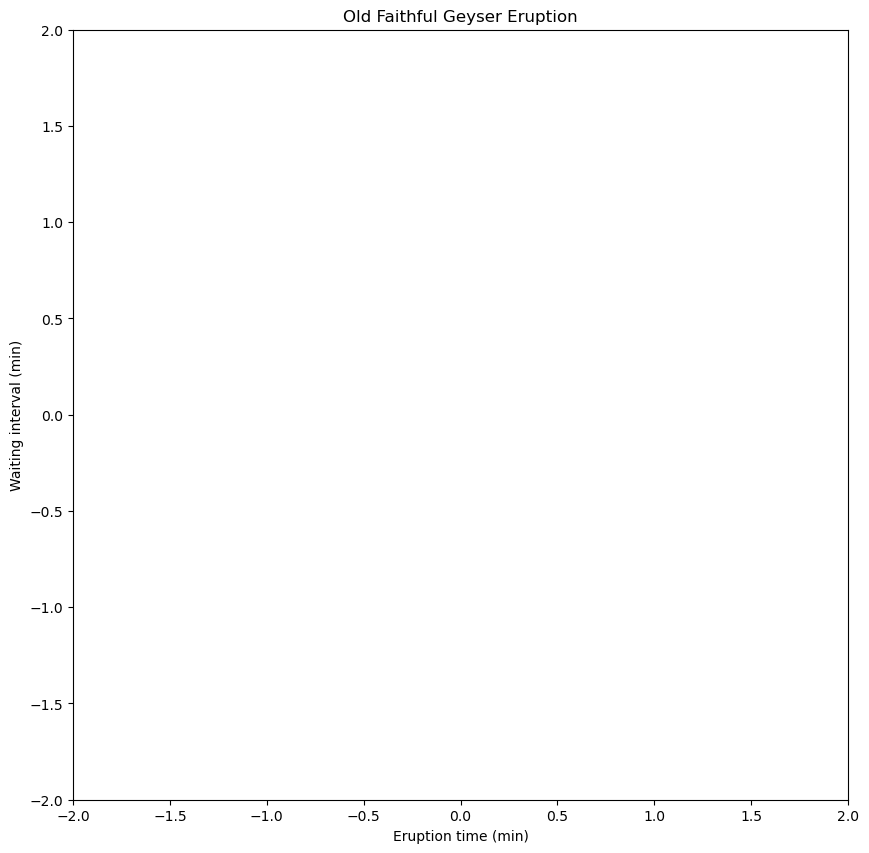

In [25]:
# plot result
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.scatter(X[:, 0], X[:, 1], c=y, cmap="Set2")

pc.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], ax=ax, markers='^', c='r')

ax.set_xlabel('Eruption time (min)')
ax.set_ylabel('Waiting interval (min)')
ax.set_title('Old Faithful Geyser Eruption')

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
plt.show()

In [26]:
X = faithful[['eruptions', 'waiting']].to_numpy()

In [27]:
gmm = GaussianMixture(n_components=3, n_init=10)
gmm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [28]:
y = gmm.fit_predict(X)

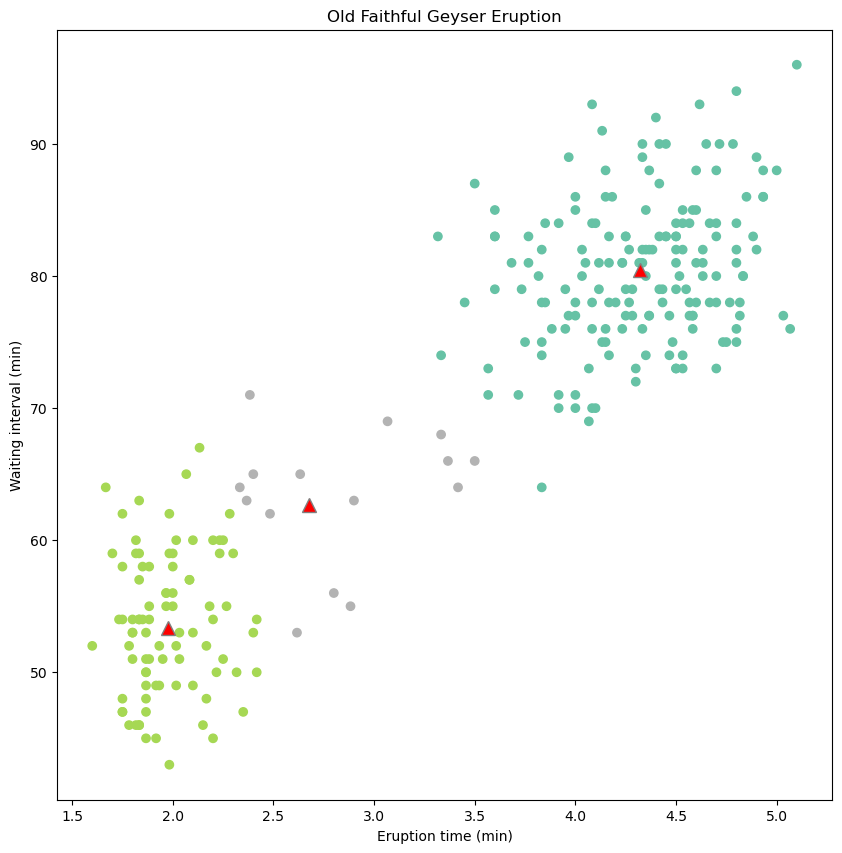

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.scatter(X[:, 0], X[:, 1], c=y, cmap="Set2")
pc.discrete_scatter(gmm.means_[:, 0], gmm.means_[:, 1], ax=ax, markers='^', c='r')
ax.set_xlabel('Eruption time (min)')
ax.set_ylabel('Waiting interval (min)')
ax.set_title('Old Faithful Geyser Eruption')
plt.show()

## Clustering Iris data set

**Description**

This famous (Fisher's or Anderson's) iris data set gives the measurements in centimeters of the variables sepal length and width and petal length and width, respectively, for 50 flowers from each of 3 species of iris. The species are *Iris setosa*, *versicolor*, and *virginica*.

**Format**

iris is a data frame with 150 cases (rows) and 5 variables (columns) named Sepal.Length, Sepal.Width, Petal.Length, Petal.Width, and Species.

**Source**

Fisher, R. A. (1936) The use of multiple measurements in taxonomic problems. *Annals of Eugenics*, 7, Part II, 179–188.

The data were collected by Anderson, Edgar (1935). The irises of the Gaspe Peninsula, *Bulletin of the American Iris Society*, 59, 2–5.


In [30]:
# load iris dataset
iris = pd.read_csv('Iris.csv')
iris.drop(columns=['Id'], inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
iris_feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
iris_target_names, y_iris = np.unique(iris['Species'].to_numpy(), return_inverse=True)

X = iris[iris_feature_names].to_numpy()

**Objective:**

- Compare different clustering methods with $K=3$ on the iris data set and compare the obtained clusters
  with the true classes (use ``crosstab`` function)

In [32]:
def crosstab(y_true, y_cluster):
    """Compute a cross matrix.

    Parameters
    ----------

    y_true : nd-array
             input data, the labels of the true classes

    y_cluster : nd-array
                input data, the labels of the clusters
    """
    if np.shape(y_true) != np.shape(y_cluster):
        print("Different shape for y_true and y_cluster")
        return None
    labels = pd.DataFrame({'labels': y_true, 'clusters': y_cluster})
    return pd.crosstab(index=labels['labels'], columns=labels['clusters'], margins=True)

## Clustering Breast Cancer data set and Digits data set

#### Breast Cancer data set

**Description:**

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

**Acknowledgements:**

This dataset has been referred from Kaggle.


In [33]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

In [34]:
gmm = GaussianMixture(n_components=2, n_init=10)
gmm.fit(cancer.data)
gmm

GaussianMixture(n_components=2, n_init=10)

In [35]:
y = gmm.fit_predict(cancer.data)
y[0:5]

array([0, 0, 0, 0, 0])

In [36]:
crosstab(cancer.target, y)

clusters,0,1,All
labels,,,
0,195,17,212
1,11,346,357
All,206,363,569


### Digits data set

This dataset is made up of 1797 8x8 images.
Each image, like the one shown below, is of a hand-written digit.
In order to utilize an 8x8 figure like this, we’d have to first transform
it into a feature vector with length 64.

Record use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus.
The input and display areas are located in the same place.
Attached to the serial port of an Intel 486 based PC, it allows to collect handwriting samples.
The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds.

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution. Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to write only inside these boxes. If they make a mistake or are unhappy with their writing, they are instructed to clear the content of a box by using an on-screen button. The first ten digits are ignored because most writers are not familiar with this type of input devices, but subjects are not aware of this. 

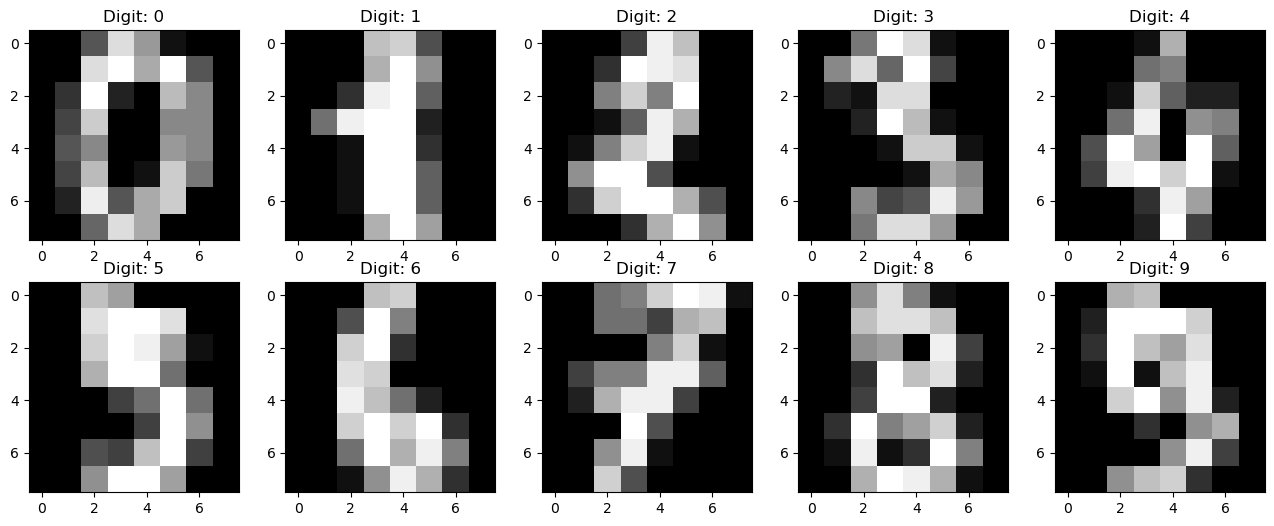

In [37]:
from sklearn.datasets import load_digits

digits = load_digits()

X_digits, y_digits = digits.data, digits.target

plt.figure(figsize=(16, 6))
#_, axes = plt.subplots(2, 5)
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    ax.imshow(X_digits[i, :].reshape([8, 8]), cmap='gray')
    ax.set_title('Digit: %i' % y_digits[i])

**Objective:**

- Compare different clustering methods on the ``Breast Cancer`` and the ``Digits`` data set and compare 
  the obtained clusters with the true classes (use ``crosstab`` function)

- Perform dimension reduction using PCA and t-SNE and perform clustering on the dimension reduced data set. 
  Compare the results. Does it improve the recovery of the true classes ?

In [38]:
gmm = GaussianMixture(n_components=10, n_init=10, covariance_type='diag')
gmm.fit(X_digits)
gmm

GaussianMixture(covariance_type='diag', n_components=10, n_init=10)

In [39]:
y = gmm.fit_predict(X_digits)
crosstab(y_digits, y)

clusters,0,1,2,3,4,5,6,7,8,9,All
labels,,,,,,,,,,,
0,0,171,0,0,0,5,1,0,0,1,178
1,28,0,0,0,0,4,69,24,3,54,182
2,141,0,0,15,0,5,14,0,0,2,177
3,20,0,2,6,0,125,13,17,0,0,183
4,0,0,17,0,146,0,2,3,0,13,181
5,1,0,6,1,0,63,2,108,1,0,182
6,0,0,0,0,0,4,3,1,172,1,181
7,0,0,156,0,1,15,1,2,0,4,179
8,21,0,1,1,0,47,57,44,0,3,174
